# Multiple Linear Regression

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

In [9]:
df_index = pd.read_csv('economic_index.csv')

In [11]:
df_index.head()

Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256

In [15]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [17]:
df_index.head()

interest_rate  unemployment_rate  index_price
0           2.75                5.3         1464
1           2.50                5.3         1394
2           2.50                5.3         1357
3           2.50                5.3         1293
4           2.50                5.4         1256

In [19]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

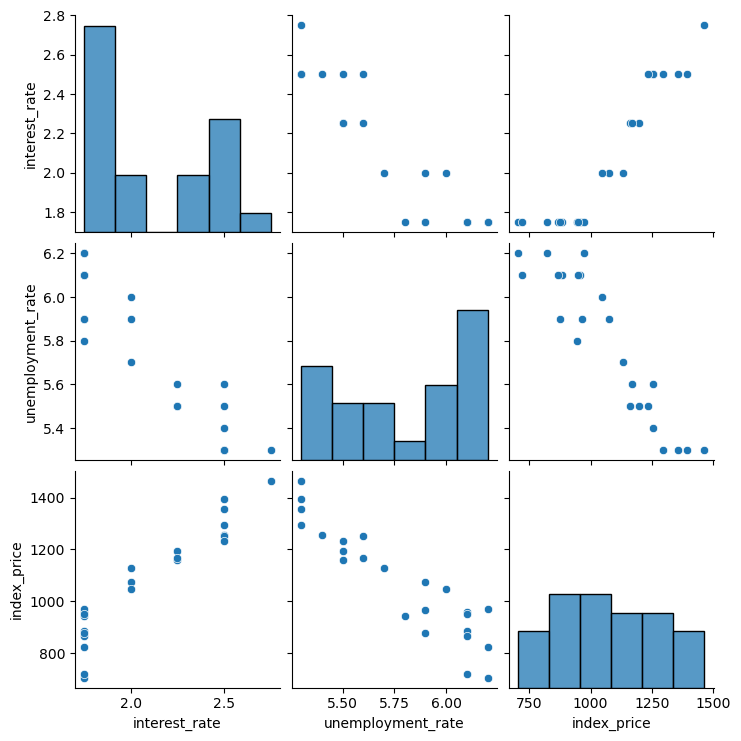

In [33]:
sns.pairplot(df_index)
plt.show()

In [35]:
df_index.corr()

interest_rate  unemployment_rate  index_price
interest_rate           1.000000          -0.925814     0.935793
unemployment_rate      -0.925814           1.000000    -0.922338
index_price             0.935793          -0.922338     1.000000

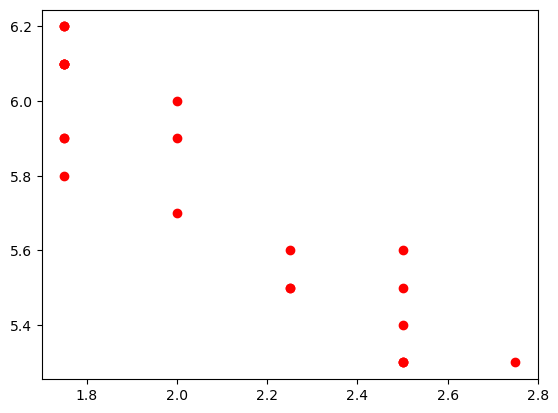

In [41]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.show()

In [43]:
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [45]:
X.head()

interest_rate  unemployment_rate
0           2.75                5.3
1           2.50                5.3
2           2.50                5.3
3           2.50                5.3
4           2.50                5.4

In [47]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

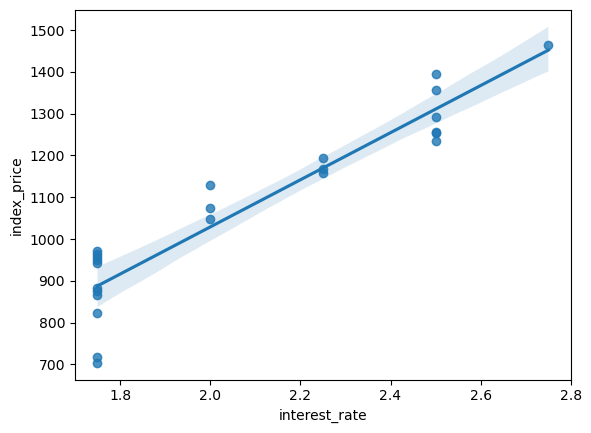

In [67]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])
plt.show()

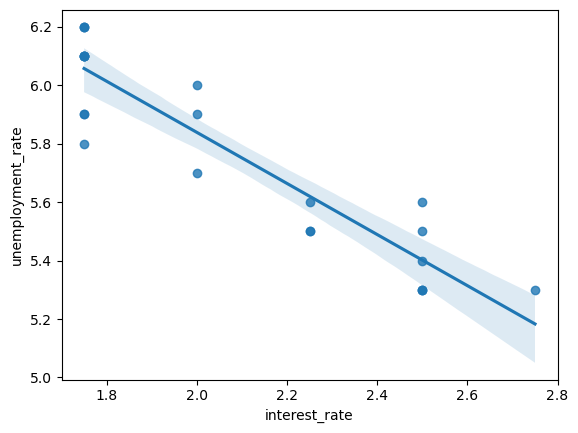

In [69]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])
plt.show()

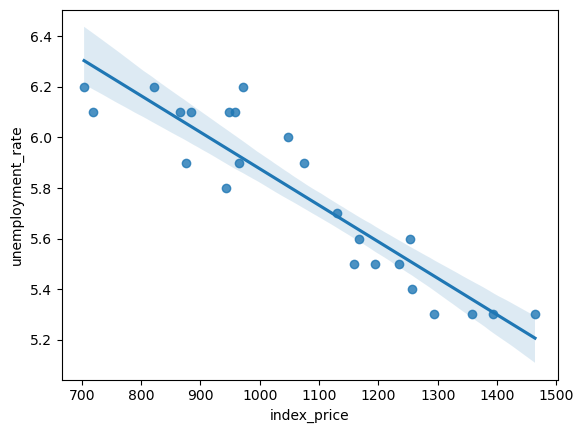

In [71]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])
plt.show()

In [73]:
scaler= StandardScaler()

In [75]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [77]:
regression = LinearRegression()

In [81]:
regression.fit(X_train,y_train)

LinearRegression()

In [83]:
validation_score = cross_val_score(regression,
                                   X_train,
                                   y_train,
                                   scoring='neg_mean_squared_error',
                                   cv=3)

In [87]:
np.mean(validation_score)

-5914.828180162396

In [91]:
y_pred = regression.predict(X_test)

In [93]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [95]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [97]:
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010254


In [99]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683756

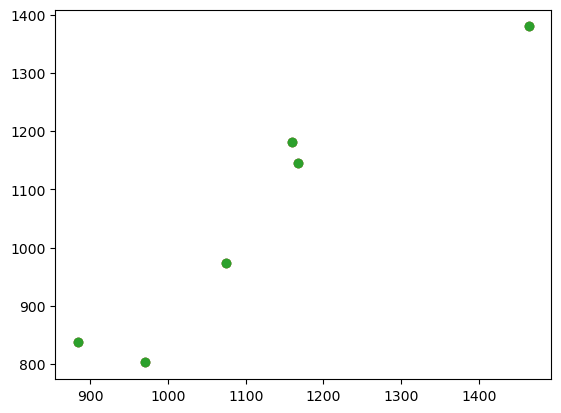

In [105]:
plt.scatter(y_test,y_pred)
plt.show()

In [107]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


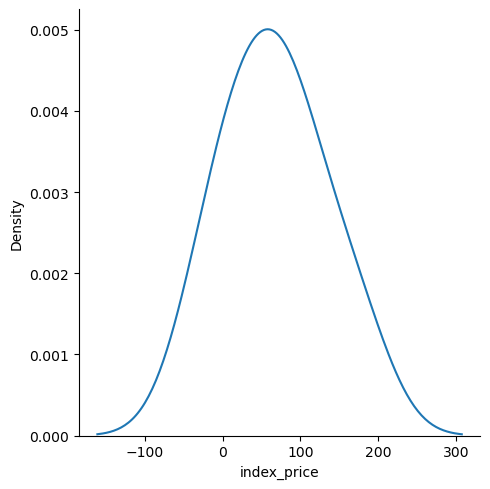

In [116]:
sns.displot(residuals,kind='kde')
plt.show()

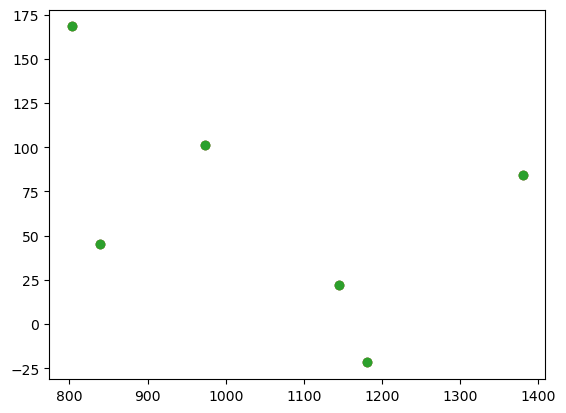

In [122]:
plt.scatter(y_pred,residuals)
plt.show()

In [124]:
model = sm.OLS(y_train,X_train).fit()

In [126]:
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 08 May 2025   Prob (F-statistic):                       0.754
Time:                        22:49:52   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
print(regression.coef_)

[  88.27275507 -116.25716066]
